In [1]:
import gzip
import pickle
import seaborn as sns

In [2]:
with gzip.open("explored-models/models.pkl.gz", "rb") as pkl:
    data = pickle.load(pkl)

data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions
0,btc-mh-2,bitcoin,2,0,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),0.058766,81,4,259
1,btc-ms-2,bitcoin,0,2,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),0.007847,12,4,26
2,eth-2-ms-2,ethereum-wp-2,0,2,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),0.004855,16,4,26
3,eth-3-ms-2,ethereum-wp-3,0,2,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),0.004826,16,4,26
4,byz-2-ms-2,ethereum-bz-2,0,2,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),0.004949,16,4,26
...,...,...,...,...,...,...,...,...,...,...
98,btc-ms-18,bitcoin,0,18,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),203.941198,60507,4,313176
99,btc-ms-19,bitcoin,0,19,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),274.680727,77689,4,404927
100,btc-ms-20,bitcoin,0,20,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),371.007743,98480,4,516954
101,btc-ms-21,bitcoin,0,21,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),487.724452,123584,4,652485


In [3]:
data.groupby("protocol").agg({"maximum_height": "max", "maximum_size": "max"})

,maximum_height,maximum_size
protocol,,
bitcoin,13,22
ethereum-bz-2,0,10
ethereum-bz-3,0,9
ethereum-wp-2,0,10
ethereum-wp-3,0,9
parallel-2,0,14
parallel-3,0,13
parallel-4,0,12


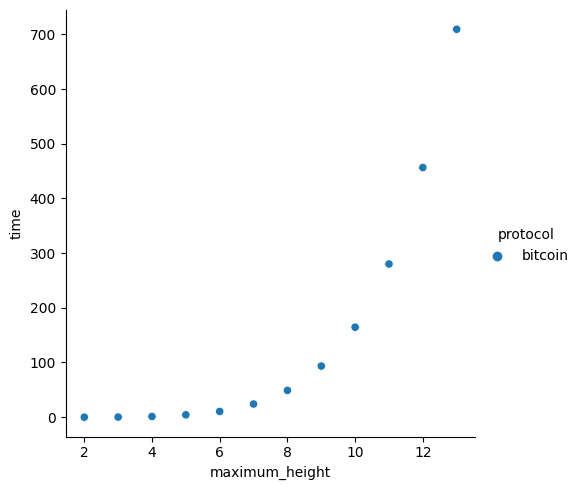

In [4]:
sns.relplot(
    data.query("maximum_height > 0"),
    x="maximum_height",
    y="time",
    hue="protocol",
)

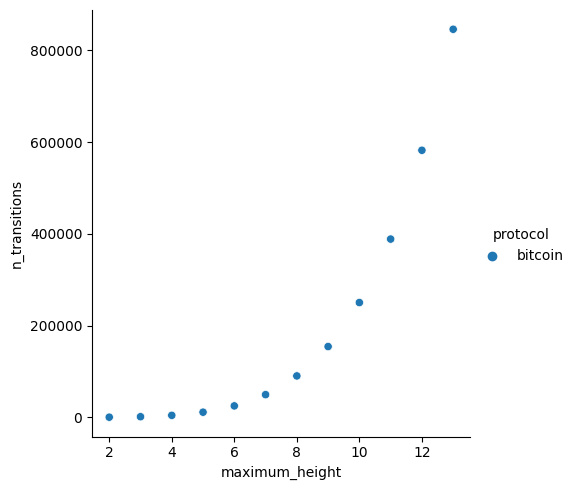

In [5]:
sns.relplot(
    data.query("maximum_height > 0"),
    x="maximum_height",
    y="n_transitions",
    hue="protocol",
)

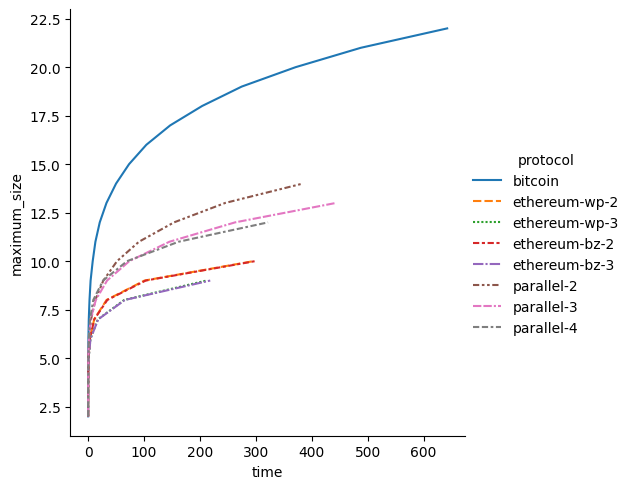

In [6]:
g = sns.relplot(
    data.query("maximum_size > 0"),
    kind="line",
    x="time",
    y="maximum_size",
    hue="protocol",
    style="protocol",
)
g.set()

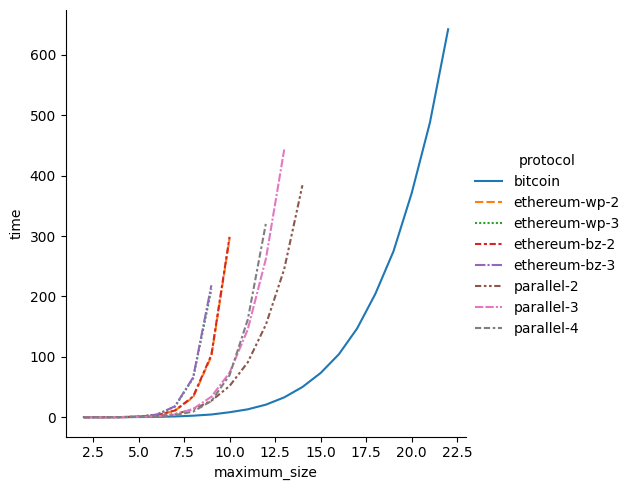

In [7]:
g = sns.relplot(
    data.query("maximum_size > 0"),
    kind="line",
    x="maximum_size",
    y="time",
    hue="protocol",
    style="protocol",
)

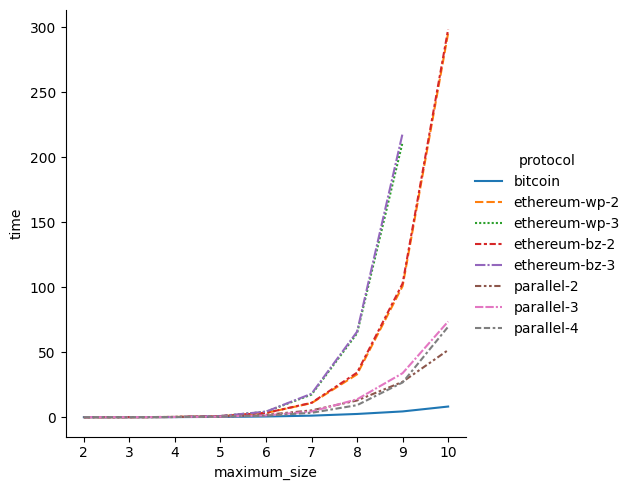

In [8]:
g = sns.relplot(
    data.query("maximum_size > 0 and maximum_size < 11"),
    kind="line",
    x="maximum_size",
    y="time",
    hue="protocol",
    style="protocol",
)

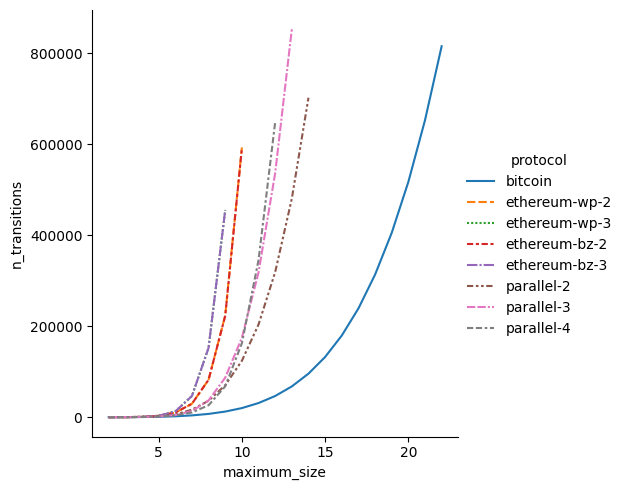

In [9]:
g = sns.relplot(
    data.query("maximum_size > 0"),
    kind="line",
    x="maximum_size",
    y="n_transitions",
    hue="protocol",
    style="protocol",
)